<span style="color:#2e8dc9; font-size:28px; font-weight:700">   Logistic Regression Revisited</span>

The linear regression model discussed in module 5 assumes that the response variable $Y$ is 
quantitative (continuous numerical value). 
However, what happens if the response variable is qualitative (categorical). 
For example, eye color is qualitative taking values blue, brown, green, etc. 
The process of predicting qualitative responses is known as **classification**, as you have been learning.

Often the methods used for classification first predict the probability of each of the 
categories of a qualitative variable, as the basis for making the classification. 
In this sense, they also behave like regression methods.

An example classification problem could be an online banking service that must be able 
to determine whether or not a transaction being performed on the site is fraudulent, 
on the basis of the user’s IP address, past transaction history etc. 
In this notebook we will continue our discussion on Logistic Regression. 
We will refer to both our `Heart Disease` and then, primarily, the `Default` data set. 
For the `Default` data, we are interested in predicting whether an individual will 
default on his or her credit card payment, on the basis of annual income and monthly credit card balance.

<span style="color:#e5065c; font-size:18px; font-weight:700">  Why not Linear Regression?

It is stated Linear Regression is not an ideal choice predicting a categorical variable. 
Suppose that we are trying to predict the medical condition of a patient in the emergency room on the basis of her symptoms. 
There are three possible diagnoses: stroke, drug overdose, and epileptic seizure. 
We could consider encoding these values as a quantitative response variable, $Y$ , as follows:

$$Y=\begin{gather*}
\begin{cases}
1,\ if\ Stroke;\\
2,\ if\ Drug\ Overdose;\\
3,\ if\ Epileptic\ Seizure.\\
\end{cases}
\end{gather*}$$

Using this coding, least squares could be used to fit a linear regression model to predict Y 
on the basis of a set of predictors $X_1, . . .,X_p$. 
Unfortunately, this coding implies an ordering on the outcomes, 
putting drug overdose in between stroke and epileptic seizure, 
and insisting that the difference between stroke and drug overdose is the same 
as the difference between drug overdose and epileptic seizure. 
In practice there is no particular reason that this needs to be the case. 
For instance, one could choose an equally reasonable coding,

$$Y=\begin{gather*}
\begin{cases}
1,\ if\ Epileptic\ Seizure.\\
2,\ if\ Stroke;\\
3,\ if\ Drug\ Overdose;\\
\end{cases}
\end{gather*}$$

which would imply a totally different relationship among the three conditions. 

Each of these codings would produce fundamentally different linear models that would 
ultimately lead to different sets of predictions on test observations. 
In general there is no natural way to convert a qualitative response variable with more than two 
levels into a quantitative response that is ready for linear regression.

If there are only two possibilities for the patient’s medical condition: stroke and drug overdose. 
We could then potentially use the dummy variable approach to code the response as follows:

$$Y=\begin{gather*}
\begin{cases}
1,\ if\ Stroke;\\
2,\ if\ Drug\ Overdose;\\
\end{cases}
\end{gather*}$$


We could then fit a linear regression to this binary response, and predict drug overdose 
if $\hat{Y}$ >0.5 and stroke otherwise. 
In the binary case it is not hard to show that even if we flip the above coding, 
linear regression will produce the same final predictions. 
For a binary response with a 0/1 coding as above, regression by least squares does make sense.

#### Below is a pictorial illustration of why linear regression is a bad choice for categorical variables. 

<img src="../images/linear_vs_logistic_regression.JPG">

The picture on the left is the estimated probability of using linear regression. 
Some estimated probabilities are negative! 
The orange ticks indicate the 0/1 values coded for default (No or Yes). 
The right plot is the predicted probabilities of default using logistic regression. 
All probabilities lie between 0 and 1.

Considering the data set, the response will be either Yes or No. 
Rather than modeling this response Y directly, 
logistic regression models the probability that Y belongs to a particular category. 

For example, the probability of **default given balance** can be written as

$$P(default = Yes\ |\ balance).$$

The values of $P(default = Yes\ |\ balance)$, which we abbreviate `P(default|balance)`, will range between 0 and 1. 
Then for any given value of balance, a prediction can be made for default.

<span style="color:#e5065c; font-size:18px; font-weight:700"> Logistic Model

The relationship we are interested in the above plot is between $P(Y = 1\ |\ X)$ 
(call this a function of X, $p(x)$) and X (predict Y=1 for a given value of X). 
The problem in using the linear regression equation $p(X) = \beta_0$ + $\beta_1 X$ 
is for balances close to zero we predict a negative probability of _default_. 
If we were to predict for very large balances, we would get values bigger than 1. 
The predictions are not sensible, since true probability must fall between 0 and 1. 
This problem is not unique to the credit default data. 
Any time a straight line is fit to a binary response that is coded as 0 or 1, 
in principle we can always predict p (X) < 0 for some values of X and p (X) > 1 
for others (unless the range of X is limited).

To avoid this problem, we must model $p(X)$ using a function that gives outputs between 0 and 1 for all posible values of X. 
In logistic regression, we use the logistic function shown below 

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$$

To fit the above model, we use a method called Maximum Likelihood. 
After manipulating the above equation a little bit we find that 

$$\frac{p(X)}{1 − p(X)} = e^{\beta_0+\beta_1X}$$

The logistic function above will always produce an S-shaped curve as shown in right hand side plot, 
and so regardless of the value of X, we will obtain a sensible prediction. 
For low balances we now predict the probability of default as close to, 
but never below, zero. 
Likewise, for high balances we predict a default probability close to, 
but never above, one. 


The quantity $p(X)/[1−p(X)]$ is called the odds, and can take on any value between 0 and ∞. 
Values of the odds close to 0 and ∞ indicate very low and very high probabilities of default in our example, respectively. 
For example, on average 1 in 5 people with an odds of 1/4 will default, 
since p(X) = 0.2 implies an odds of $\frac{0.2}{1−0.2} = 1/4$. 
Likewise on average nine out of every ten people with an odds of 9 will default, 
since p (X) = 0.9 implies an odds of $\frac{0.9}{1−0.9} = 9$.

By taking the logarithm of both sides of the above equation, we arrive at 

$$log\bigg(\frac{p(X)}{1 − p(X)}\bigg) = \beta_0 + \beta_1X$$

The left-hand side is called the log-odds or logit. 
In a linear regression model, $\beta_1$ gives the average change in Y associated with a one-unit increase in X. 
In contrast, in a logistic regression model, increasing X by one unit changes the log odds by $\beta_1$, 
or equivalently it multiplies the odds by ${e^{\beta_1}}$


<span style="color:#e5065c; font-size:18px; font-weight:700"> Estimating the Regression Coefficients

Maximum likelihood is used to estimate coefficients. 
The basic intuition behind using maximum likelihood to fit a logistic regression model is as follows: 
We seek estimates for $\beta_0$ and $\beta_1$ such that the predicted probability $\hat{p}(x_i)$ 
of _default_ for each individual, corresponds as closely as possible to the individual’s observed default status. 
In other words, we try to find $\hat{\beta_0}$ and $\hat{\beta_1}$ such that 
plugging these estimates into the model for p (X), i.e.

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$$

This yields a number close to one for all individuals who defaulted, 
and a number close to zero for all individuals who did not. 
The estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ are chosen to maximize this likelihood function.

The table below shows the coefficient estimates and related information that result from fitting a 
logistic regression model on the Default data in order to predict the probability of `default=Yes` using balance.

<table>
    <tr>
        <th></th>
        <th>Coefficient Std.</th>
        <th>error</th>
        <th>Z-statistic</th>
        <th>P-value</th>
    </tr>
    <tr>
        <td>Intercept</td>
        <td>-10.6513</td>
        <td>0.3612</td>
        <td>-29.5</td>
        <td> &lt;0.0001</td>
    </tr>
    <tr>
        <td>Balance</td>
        <td>0.0055</td>
        <td>0.0002</td>
        <td>24.9</td>
        <td>&lt;0.0001</td>
    </tr>
</table>
        
We see that $\hat{\beta_1} = 0.0055$ this indicates that an increase in balance is associated 
with an increase in the probability of default. 
To be precise, a one unit increase in balance is associated with an increase in the log odds 
of default by 0.0055 units.

<span style="color:#e5065c; font-size:18px; font-weight:700"> Making Predictions

Once the coefficients have been estimated, 
you compute the probability of default for any given credit card balance. 
For example, using the coefficient estimates given in the above table, 
we predict that the _default_ probability for an individual with a balance of $1,000 is 

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}} = \frac{e^{-10.6513+0.0055*1000}}{1 + e^{-10.6513+0.0055*1000}} = 0.00576$$

which is below $1%$. In contrast, the predicted probability of default for an individual with 
a balance of $2,000 is much higher, and equals 0.586 or 58.6%.

One can use qualitative predictors with the logistic regression model using the dummy variable approach. 
As an example, the Default data set contains the qualitative variable student. 
To fit the model we simply create a dummy variable that takes on a value of 1 for students and 0 for non-students. The logistic regression model that results from predicting probability of default from student status can be seen below...



<table>
    <tr>
        <th></th>
        <th>Coefficient Std.</th>
        <th>error</th>
        <th>Z-statistic</th>
        <th>P-value</th>
    </tr>
    <tr>
        <td>Intercept</td>
        <td>-3.5041</td>
        <td>0.0707</td>
        <td>-49.55</td>
        <td> &lt;0.0001</td>
    </tr>
    <tr>
        <td>Balance</td>
        <td>0.4049</td>
        <td>0.1150</td>
        <td>3.52</td>
        <td>&lt;0.0004</td>
    </tr>
</table>


The coefficient associated with the dummy variable is positive and the associated p-value is statistically significant. 
This indicates that students tend to have higher default probabilities than non-students.

$$\hat{P}(default=Yes\ |\ student=Yes) =  \frac{e^{-3.5041+0.4049*1}}{1 + e^{-3.5041+0.4049*1}} = 0.0431$$

$$\hat{P}(default=Yes\ |\ student=No) =  \frac{e^{-3.5041+0.4049*0}}{1 + e^{-3.5041+0.4049*0}} = 0.0292$$


<span style="color:#e5065c; font-size:18px; font-weight:700"> Multiple Logistic Regression

We now consider the problem of predicting a binary response using multiple predictors. By analogy with the extension from simple to multiple linear regression in module 5, we can generalize the equation for the odds as follows:

$$log\bigg(\frac{p(X)}{1 − p(X)}\bigg) = \beta_0 + \beta_1X_1 + · · · + \beta_pX_p$$ where X = (X1, . . .,Xp) are p predictors

And the logistic function equation can be written as... 

$$p(X) = \frac{e^{\beta_0+\beta_1X_1+···+\beta_pX_p}}{1 + e^{\beta_0+\beta_1X_1+···+\beta_pX_p}}$$

<span style="color:#e5065c; font-size:18px; font-weight:700"> Logistic Regression for >2 Response Classes

When the response variable has multiple categories like the medical condition example,
with levels _stroke_, _drug overdose_, and _epileptic seizure_, we would like to model 
both `P (Y = stroke|X)` and P `(Y = drug overdose|X)`, 
with the remaining `P (Y = epileptic seizure|X) = 1 − P (Y = stroke|X) − P (Y = drug overdose|X)`. 
The logistic regression model discussed before has a multiple-class extensions, 
but in practice they are not used often for multiple class situations because there are 
other popular approaches for multiple-class classification, such as Linear Discriminant Analysis (LDA). 

<span style="color:#e5065c; font-size:18px; font-weight:700"> Fitting a logistic regression model

Now we will fit a logistic regression model on Stock Market Data in ISLR package. 
This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, 
from the beginning of 2001 until the end of 2005. 
For each date, the percentage returns for each of the five previous trading days, 
Lag1 through Lag5 are recorded. 
The Volume (the number of shares traded on the previous day, in billions), 
Today (the percentage return on the date in question) and 
Direction (whether the market was Up or Down on this date) are also recorded.

In [2]:
install.packages("ISLR")
library(ISLR)

# Check the names of columns present in the dataset.
names(Smarket)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [3]:
# Check the dimensions of the data.
dim(Smarket)

[1] 1250    9

In [4]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [5]:
# The Direction variable is qualitative. cor() accepts numeric values only. 
#    So exclude Direction from the input to cor function
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


The correlations between the lag variables and today’s returns are close to zero. 
In other words, there appears to be little correlation between today’s returns and previous days’ returns. 
The only substantial correlation is between Year and Volume. 
By plotting the data we see that Volume is increasing over time. 
In other words, the average number of shares traded daily increased from 2001 to 2005.

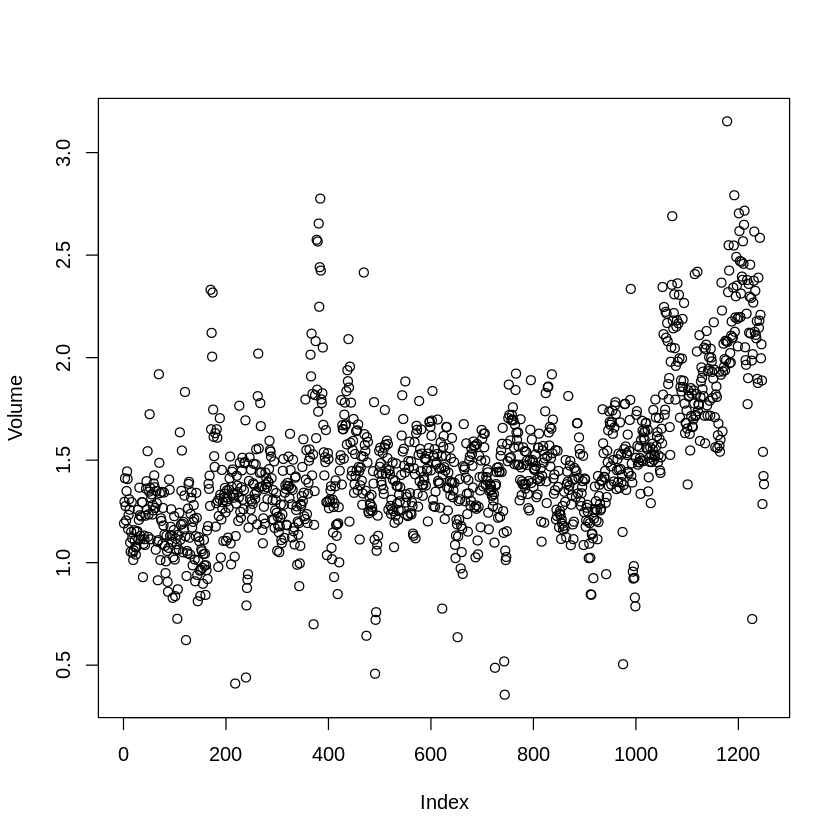

In [6]:
# Telling R that we are going to use Smarket dataset in this data. You can refer to columns in Smarket without referring to the
# Smarket everytime.
attach(Smarket)
plot(Volume)

`Smarket` has data spanning across years 2001 to 2005. 
We can subset the data into training and testing sets. 
We will create a vector corresponding to the observations from 2001 through 2004, holding true values;
then false values for the year 2005.
Then, use this vector to create two datasets of observations one with data from 2001 to 2004 and the other one containing 2005 data...

In [7]:
# The object train is a vector of 1,250 elements. The elements of the 
# vector that correspond to observations that occurred before 2005 are 
# set to TRUE as they satisfy the condition "Year<2005". 
# whereas those that correspond to observations in 2005 are set to FALSE. 
train = Year<2005

# train is a Boolean vector, since its elements are TRUE and FALSE. 
# So, the TRUE and FALSE values corresponding to each row
# will let you subset rows or columns of a matrix. For instance, the 
#  command Smarket[!train,] would pick out a submatrix of the
# stock market dataset, corresponding to observations in 2005, since 
#  those are the ones for which the elements of train are 
# FALSE and `!` operator will reverse the elements of train vector.
Smarket.2005= Smarket[!train,]

# Check the dimensions of Smarket.2005
dim(Smarket.2005)

# Save the Direction values corresponding to 2005 dates.
Direction.2005 = Direction[!train]

[1] 252   9

We can then fit a logistic regression model using only the subset of the observations that correspond to dates before 2005, using the subset argument.

In [8]:
# subset argument below is providing the condition for what data to be selected from Smarket. 
# If you are not sure what's happening run below table command. 
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)

# The glm() function fits generalized glm() linear models, a class of models that includes logistic regression. 

# We must pass in the argument `family=binomial` in order to tell R to run a logistic regression, rather than 
# some other type of generalized linear model.

# Predicted probabilities of the stock market for each of the days in 
# the test set that is, for the days in 2005
glm.probs = predict(glm.fit, Smarket.2005, type="response")

# The predict() function can be used to predict the probability that the market will go up, given values 
# of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X), 
# as opposed to other information such as the logit. If no data set is supplied to the predict() function, 
# then the probabilities are computed for the training data that was used to fit the logistic regression model.

In [9]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


None of the predictors are good enough to predict the direction of the stock market. 

In [10]:
# Subset the data for years from 2001 through 2004 using train vector. Use table function to see the
# distribution of Year values in the subset.
table(subset(Smarket, train)$Year)


2001 2002 2003 2004 
 242  252  252  252 

We trained the model using only the dates before 2005, 
and the fitted model is tested on data with dates in 2005. 
The predictions for 2005 are in glm.probs. 
Compare them to the actual movements of the market over that time period.

In [11]:
# Create a vector glm.pred of size 252 to store the predictions. 
# Assign the value `down` initially for entire vector 
glm.pred=rep("Down" ,252)

# Update the predictions in glm.pred to 'up' if predicted probability is greater than 0.5
glm.pred[glm.probs >0.5]="Up"

# table() function can be used to produce a confusion matrix in order to determine how many observations 
# were correctly or incorrectly classified.
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

Use the names() function to find out what other pieces of information are stored in glm.fit...

In [12]:
names(glm.fit)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [13]:
# Use the coef() function in order to access just the coefficients for this fitted model
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
 0.191212621 -0.054178292 -0.045805334  0.007200118  0.006440875 -0.004222672 
      Volume 
-0.116256960

In [14]:
confint(glm.fit)

# confint() computes confidence intervals

# The "Waiting for profiling to be done..." message is telling you that it's calculating a profile likelihood ratio 
# confidence interval.

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.46299074,0.84720504
Lag1,-0.15617317,0.04713105
Lag2,-0.14777249,0.05558532
Lag3,-0.09416336,0.10859586
Lag4,-0.09506013,0.10793957
Lag5,-0.10464869,0.09612802
Volume,-0.58733257,0.35363815


In [15]:
mean(glm.pred==Direction.2005)
mean(glm.pred!= Direction.2005)

[1] 0.4801587

[1] 0.5198413

The `!=` notation means **not equal** to and so the last command computes the test set error rate. 
The test error rate is 52%, which is worse than random guessing. 
Therefore, we will remove the variables that appear not to be helpful in predicting Direction. 
Using predictors that have no relationship with the response variable tends to cause a 
deterioration in the test error rate, 
since such predictors cause an increase in variance without a corresponding decrease in bias.

We will refit the logistic regression using just `Lag1` and `Lag2` which have better P-values compared to rest. 

In [16]:
glm.fit=glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset =train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")

glm.pred=rep("Down", 252)
glm.pred[glm.probs >0.5]="Up"

table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [17]:
mean(glm.pred == Direction.2005)

[1] 0.5595238

In [18]:
106/(106+76)

[1] 0.5824176

The results look good compared to the previous model. 
56% of the daily movements have been correctly predicted. 
The confusion matrix suggests that on days when logistic regression predicts that the market will decline, 
it is only correct 50% of the time. 
However, on days when it predicts an increase in the market, it has a 58% accuracy rate.

# Save your notebook!